In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import geopandas as gpd
import pycountry
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


##### Understanding the data

In [3]:
data = pd.read_csv('Environment_Temperature_change_E_All_Data.csv', encoding='ISO-8859-1')
new_columns = {col: col[1:] if col.startswith('Y') else col for col in data.columns}
data.rename(columns=new_columns, inplace=True)
data

,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,1961,1961F,1962,1962F,1963,1963F,1964,1964F,1965,1965F,1966,1966F,1967,1967F,1968,1968F,1969,1969F,1970,1970F,1971,1971F,1972,1972F,1973,1973F,1974,1974F,1975,1975F,1976,1976F,1977,1977F,1978,1978F,1979,1979F,1980,1980F,1981,1981F,1982,1982F,1983,1983F,1984,1984F,1985,1985F,1986,1986F,1987,1987F,1988,1988F,1989,1989F,1990,1990F,1991,1991F,1992,1992F,1993,1993F,1994,1994F,1995,1995F,1996,1996F,1997,1997F,1998,1998F,1999,1999F,2000,2000F,2001,2001F,2002,2002F,2003,2003F,2004,2004F,2005,2005F,2006,2006F,2007,2007F,2008,2008F,2009,2009F,2010,2010F,2011,2011F,2012,2012F,2013,2013F,2014,2014F,2015,2015F,2016,2016F,2017,2017F,2018,2018F,2019,2019F,2020,2020F,2021,2021F,2022,2022F
0,2,'004,Afghanistan,7001,January,7271,Temperature change,°C,0.756,E,0.030,E,2.716,E,-5.260,E,1.834,E,3.780,E,-1.398,E,0.349,E,-2.325,E,0.765,E,-1.527,E,-1.299,E,-2.929,E,-1.194,E,-0.473,E,2.430,E,-3.001,E,-0.651,E,1.138,E,-0.505,E,1.725,E,0.715,E,0.621,E,-0.106,E,0.528,E,0.345,E,2.689,E,1.223,E,-1.127,E,0.530,E,0.031,E,0.607,E,-0.734,E,1.131,E,1.287,E,-0.720,E,1.402,E,0.953,E,0.871,E,1.577,E,-0.592,E,1.839,E,2.447,E,2.657,E,0.093,E,-1.489,E,0.499,E,-5.684,E,1.535,E,3.619,E,1.233,E,-0.504,E,1.331,E,1.698,E,1.908,E,3.444,E,1.256,E,2.051,E,2.858,E,-0.681,E,0.559,E,2.284,E
1,2,'004,Afghanistan,7001,January,6078,Standard Deviation,°C,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E
2,2,'004,Afghanistan,7002,February,7271,Temperature change,°C,-1.766,E,2.414,E,3.888,E,-0.236,E,-0.130,E,3.514,E,0.160,E,-2.102,E,-3.209,E,1.756,E,0.831,E,-7.713,E,1.854,E,-3.688,E,-1.224,E,-1.617,E,-0.169,E,-0.378,E,1.090,E,-1.194,E,1.091,E,-2.071,E,0.454,E,-4.295,E,2.550,E,-0.210,E,1.428,E,0.240,E,-2.898,E,-0.357,E,-1.382,E,-0.099,E,1.507,E,-1.358,E,-0.161,E,0.865,E,0.025,E,-0.530,E,3.237,E,-0.922,E,0.698,E,0.961,E,1.747,E,3.087,E,-1.567,E,4.826,E,1.660,E,-2.306,E,2.454,E,1.241,E,0.211,E,-3.068,E,1.558,E,-3.108,E,2.585,E,2.403,E,-0.224,E,2.714,E,0.067,E,2.500,E,4.086,E,2.371,E
3,2,'004,Afghanistan,7002,February,6078,Standard Deviation,°C,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E
4,2,'004,Afghanistan,7003,March,7271,Temperature change,°C,0.458,E,1.277,E,0.363,E,1.618,E,-0.947,E,-0.021,E,-0.663,E,0.443,E,2.429,E,-0.951,E,1.667,E,-1.770,E,-0.482,E,1.002,E,-0.575,E,-2.806,E,3.319,E,-1.557,E,-1.389,E,-0.548,E,1.160,E,-1.799,E,-2.362,E,1.792,E,-0.154,E,-3.052,E,1.349,E,0.026,E,0.074,E,-1.093,E,-0.904,E,-2.174,E,-1.427,E,1.291,E,-1.467,E,-0.367,E,0.011,E,-0.609,E,-0.229,E,-0.292,E,1.220,E,1.990,E,-0.159,E,2.837,E,1.688,E,1.945,E,-0.105,E,4.324,E,2.411,E,3.464,E,0.822,E,-0.384,E,2.324,E,-0.051,E,-0.553,E,2.388,E,0.877,E,4.533,E,0.293,E,0.555,E,2.480,E,3.598,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
# Drop unecessary columns: 
columns_to_drop = [col for col in data.columns if col.endswith('F')] #years that end with F
columns_to_drop +=['Area Code', 'Area Code (M49)' , 'Months Code','Element Code','Unit'] #Area codes, month codes, element codes and units.
data = data.drop(columns=columns_to_drop)
data.head()

,Area,Months,Element,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,January,Temperature change,0.756,0.030,2.716,-5.260,1.834,3.780,-1.398,0.349,-2.325,0.765,-1.527,-1.299,-2.929,-1.194,-0.473,2.430,-3.001,-0.651,1.138,-0.505,1.725,0.715,0.621,-0.106,0.528,0.345,2.689,1.223,-1.127,0.530,0.031,0.607,-0.734,1.131,1.287,-0.720,1.402,0.953,0.871,1.577,-0.592,1.839,2.447,2.657,0.093,-1.489,0.499,-5.684,1.535,3.619,1.233,-0.504,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
1,Afghanistan,January,Standard Deviation,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964
2,Afghanistan,February,Temperature change,-1.766,2.414,3.888,-0.236,-0.130,3.514,0.160,-2.102,-3.209,1.756,0.831,-7.713,1.854,-3.688,-1.224,-1.617,-0.169,-0.378,1.090,-1.194,1.091,-2.071,0.454,-4.295,2.550,-0.210,1.428,0.240,-2.898,-0.357,-1.382,-0.099,1.507,-1.358,-0.161,0.865,0.025,-0.530,3.237,-0.922,0.698,0.961,1.747,3.087,-1.567,4.826,1.660,-2.306,2.454,1.241,0.211,-3.068,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
3,Afghanistan,February,Standard Deviation,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602
4,Afghanistan,March,Temperature change,0.458,1.277,0.363,1.618,-0.947,-0.021,-0.663,0.443,2.429,-0.951,1.667,-1.770,-0.482,1.002,-0.575,-2.806,3.319,-1.557,-1.389,-0.548,1.160,-1.799,-2.362,1.792,-0.154,-3.052,1.349,0.026,0.074,-1.093,-0.904,-2.174,-1.427,1.291,-1.467,-0.367,0.011,-0.609,-0.229,-0.292,1.220,1.990,-0.159,2.837,1.688,1.945,-0.105,4.324,2.411,3.464,0.822,-0.384,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598


In [5]:
data['Months'].unique()


array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug',
       'Sep\x96Oct\x96Nov', 'Meteorological year'], dtype=object)

#### 

In [6]:
#season mapping for data that include 3 months in the 'Months' column.
season_mapping = {
    'Dec\x96Jan\x96Feb': 'Winter',
    'Mar\x96Apr\x96May': 'Spring',
    'Jun\x96Jul\x96Aug': 'Summer',
    'Sep\x96Oct\x96Nov': 'Fall'
}

data.replace(season_mapping, inplace=True)
data['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'Winter',
       'Spring', 'Summer', 'Fall', 'Meteorological year'], dtype=object)

## Global average temperature change

The goal of this section is to analyze and visualize the trend of global temperature change from 1961 to 2022. It starts by filtering the data to include only the rows related to temperature change, it excludes seasonal and meteorological year data, and retains only the records corresponding to countries (not continents etc.). Then, it calculates the mean temperature change across all countries for each year, transposes the data, and make the final adjustions. The goal is to present an aggregated view of how temperatures have changed across the world over the years 1961 to 2022. The resulting chart offers a visual representation of this global trend and illustrates an upward trend in global temperature change.

In [7]:
#Keep the necessary rows:
seasons = ['Fall', 'Spring', 'Summer', 'Winter']
temperature_change_rows = data[
    (data['Element'] == 'Temperature change') & 
    (data['Months'] != 'Meteorological year') &
    (~data['Months'].isin(seasons))
]
temperature_change_rows.head()

,Area,Months,Element,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,January,Temperature change,0.756,0.030,2.716,-5.260,1.834,3.780,-1.398,0.349,-2.325,0.765,-1.527,-1.299,-2.929,-1.194,-0.473,2.430,-3.001,-0.651,1.138,-0.505,1.725,0.715,0.621,-0.106,0.528,0.345,2.689,1.223,-1.127,0.530,0.031,0.607,-0.734,1.131,1.287,-0.720,1.402,0.953,0.871,1.577,-0.592,1.839,2.447,2.657,0.093,-1.489,0.499,-5.684,1.535,3.619,1.233,-0.504,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
2,Afghanistan,February,Temperature change,-1.766,2.414,3.888,-0.236,-0.130,3.514,0.160,-2.102,-3.209,1.756,0.831,-7.713,1.854,-3.688,-1.224,-1.617,-0.169,-0.378,1.090,-1.194,1.091,-2.071,0.454,-4.295,2.550,-0.210,1.428,0.240,-2.898,-0.357,-1.382,-0.099,1.507,-1.358,-0.161,0.865,0.025,-0.530,3.237,-0.922,0.698,0.961,1.747,3.087,-1.567,4.826,1.660,-2.306,2.454,1.241,0.211,-3.068,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
4,Afghanistan,March,Temperature change,0.458,1.277,0.363,1.618,-0.947,-0.021,-0.663,0.443,2.429,-0.951,1.667,-1.770,-0.482,1.002,-0.575,-2.806,3.319,-1.557,-1.389,-0.548,1.160,-1.799,-2.362,1.792,-0.154,-3.052,1.349,0.026,0.074,-1.093,-0.904,-2.174,-1.427,1.291,-1.467,-0.367,0.011,-0.609,-0.229,-0.292,1.220,1.990,-0.159,2.837,1.688,1.945,-0.105,4.324,2.411,3.464,0.822,-0.384,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598
6,Afghanistan,April,Temperature change,-1.772,0.053,0.861,-0.591,-1.870,-1.110,-1.381,-0.658,-0.837,1.391,1.506,-0.630,1.098,1.018,-0.659,-0.671,1.024,1.481,1.721,2.748,0.981,0.453,-1.453,0.633,0.924,-0.284,-0.330,1.366,-1.253,-0.345,-0.361,-1.169,0.528,-1.349,-0.601,-0.236,-0.504,1.459,0.209,3.488,2.770,0.942,0.557,1.178,-0.024,1.347,3.131,1.369,-1.375,2.637,1.746,1.542,0.053,0.593,1.647,0.896,1.339,1.405,0.868,0.001,1.909,4.699
8,Afghanistan,May,Temperature change,1.355,-0.151,-0.733,-0.191,-0.226,-0.198,-1.256,-1.892,-1.016,1.832,2.039,-1.034,0.743,0.187,0.491,0.654,0.530,1.087,-2.400,1.855,1.160,0.066,1.130,1.248,0.197,0.674,-0.224,1.640,-1.148,1.778,-0.777,-2.306,0.551,0.982,0.200,-0.740,-0.815,0.396,0.954,4.024,4.087,1.342,-0.876,1.689,-1.041,4.138,1.525,3.045,1.644,1.498,3.725,1.060,1.245,1.000,1.927,3.299,3.388,0.831,0.494,1.099,2.183,2.190


In [8]:
#keep only country names (not continents etc.).
country_names = [country.name for country in pycountry.countries]
global_data = temperature_change_rows[temperature_change_rows['Area'].isin(country_names)]
global_data = temperature_change_rows.drop(columns=['Months', 'Area']) #Keep only year columns
global_data = global_data.groupby('Element').mean().reset_index() #group by element to get mean of global changes through years 
global_data.rename(columns={'Element':'Year'}, inplace=True)
global_data


,Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Temperature change,0.134035,-0.032985,-0.015812,-0.122818,-0.208181,0.095216,-0.137851,-0.154091,0.106877,0.078487,-0.170456,-0.054835,0.1836,-0.110949,-0.027038,-0.199078,0.193975,0.052851,0.231576,0.205575,0.231743,0.155824,0.36054,0.092756,0.085887,0.133611,0.445051,0.429069,0.299138,0.584293,0.329841,0.271094,0.2559,0.569487,0.609817,0.313304,0.582654,0.945095,0.733038,0.689437,0.792799,0.927566,0.869032,0.783905,0.869808,0.899575,0.988309,0.810846,0.929781,1.044314,0.858711,0.877425,0.972684,1.117519,1.316469,1.41326,1.27957,1.300936,1.460815,1.50555,1.333007,1.358737


#### 

In [9]:
global_data_T = global_data.T #transpose 
global_data_T.reset_index(inplace=True) #reset the index
new_header = global_data_T.iloc[0] #first row for the header
global_data_T = global_data_T[1:] #take the data less the header
global_data_T.columns = new_header #set new_header as the header
global_data_T['Year'] = global_data_T['Year'].astype(int)
global_data_T.head()
global_data_T


,Year,Temperature change
1,1961,0.134035
2,1962,-0.032985
3,1963,-0.015812
4,1964,-0.122818
5,1965,-0.208181
...,...,...
58,2018,1.300936
59,2019,1.460815
60,2020,1.50555
61,2021,1.333007


In [10]:
fig = px.line(global_data_T, x='Year', y='Temperature change', title='Global Temperature Change (1961-2022)')
fig.add_hline(y=0, line_color="grey",line_width=1)
fig.show()


## Seasonal change

The objective of this section is to explore the seasonal variations in temperature change from 1961 to 2022. It starts by isolating data related to seasons and then focuses on the temperature change for each season. a linear regression model is employed to create a plot that captures the trend of temperature changes for each season over the years. Additionally, a bar plot is used to highlight the average temperature change for each season across the entire period.

In [12]:
seasons_data = data[data['Months'].isin(seasons)].copy() #keep rows with seasons
seasons_data = seasons_data[seasons_data['Element']== 'Temperature change'] #keep rows with temperature change
seasons_data.drop(columns=['Element', 'Area'], inplace=True) #drop necessary columns 
seasons_grouped = seasons_data.groupby('Months').mean().reset_index() #group by season and get the mean 
seasons_grouped

,Months,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Fall,0.087398,0.126803,0.273811,-0.229922,-0.144691,0.007227,0.009752,0.018302,0.121784,0.010053,-0.289407,-0.039960,-0.069727,-0.248710,-0.131967,-0.112682,0.166363,-0.059118,0.251571,0.220633,0.147508,0.146263,0.295947,0.128352,0.100020,0.097528,0.554569,0.162177,0.283069,0.583358,0.239421,0.063306,-0.019511,0.510847,0.486568,0.254579,0.591792,0.606725,0.606147,0.585943,0.695193,0.727611,0.757586,0.799932,0.874868,1.071414,0.606558,0.764255,0.961856,0.893777,0.838175,1.077053,0.972489,1.026623,1.360959,1.123870,1.183840,1.238568,1.403373,1.391843,1.265760,1.367962
1,Spring,0.319403,-0.147299,-0.171697,0.133583,-0.334123,0.049231,-0.142630,-0.237358,0.285522,0.054710,-0.182752,-0.069097,0.356498,-0.116799,0.044253,-0.355029,0.220639,0.119036,0.172796,0.267571,0.393092,0.126441,0.492233,0.155229,0.151388,0.267478,0.270815,0.525231,0.366336,0.547380,0.359922,0.355216,0.361191,0.685760,0.524786,0.254992,0.352425,1.018405,0.771854,0.839535,0.976654,1.041894,0.917921,0.771691,0.983567,0.784951,1.204530,0.966004,0.890594,1.283346,0.917719,1.000279,0.913213,1.235538,1.170940,1.600745,1.349779,1.431247,1.352122,1.498268,1.151989,1.229977
2,Summer,0.046379,-0.063086,0.122724,-0.161442,-0.194066,0.088644,-0.125350,-0.125386,0.093098,0.139661,-0.149004,-0.011652,0.254434,-0.080508,0.004915,-0.174706,0.100905,-0.073382,0.205454,0.189782,0.180069,0.237433,0.449858,0.048713,0.181593,0.202914,0.456142,0.480855,0.324393,0.493191,0.439535,0.282593,0.289205,0.559824,0.749586,0.411985,0.677137,1.023658,0.754889,0.661854,0.817123,0.936102,1.054444,0.659828,0.883703,0.991663,0.957349,0.859527,0.989176,1.229181,0.973940,1.124536,0.982981,1.040917,1.342609,1.343721,1.437837,1.337348,1.557624,1.413226,1.494354,1.502962
3,Winter,0.232239,-0.015512,-0.303746,-0.133270,-0.328943,0.257117,-0.155260,-0.455524,-0.008543,0.150171,-0.108939,-0.192394,0.409582,-0.124755,0.099106,-0.300808,0.176539,0.229447,0.268468,0.299827,0.080680,0.194506,0.171570,0.103549,-0.180869,0.042187,0.237675,0.769879,0.127778,0.658879,0.474134,0.263654,0.276358,0.579471,0.793592,0.267962,0.540492,1.186595,0.831439,0.567878,0.846965,0.991365,0.618471,0.894796,0.740011,0.681932,1.305116,0.617386,0.817280,0.988132,0.535086,0.404415,0.903082,1.113712,1.162898,1.709917,1.167715,1.176270,1.379943,1.850411,1.406779,1.391749


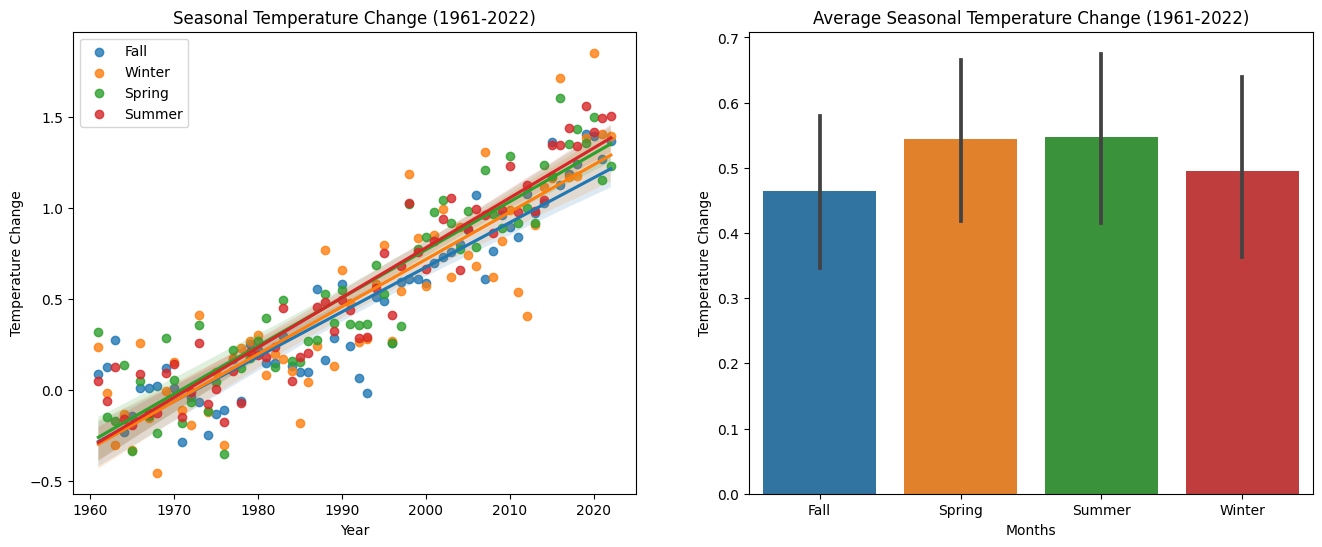

In [18]:
seasons_melted = seasons_grouped.melt(id_vars=['Months'], var_name='Year', value_name='Temperature Change') #melt seasons
seasons_melted['Year'] = pd.to_numeric(seasons_melted['Year'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for season in seasons:
    sns.regplot(x='Year', y='Temperature Change', data=seasons_melted[seasons_melted['Months'] == season], ax=axes[0], label=season)
axes[0].set_title('Seasonal Temperature Change (1961-2022)')
axes[0].legend()

sns.barplot(x='Months', y='Temperature Change', data=seasons_melted, ax=axes[1])
axes[1].set_title('Average Seasonal Temperature Change (1961-2022)')
plt.show()



## Continents

The goal of this section is to provide a comprehensive view of continental temperature changes from 1961 to 2022. It first extracts the data related to temperature changes for months, excluding seasonal or meteorological year information, and focuses on the continents. The extracted data is then transformed and aggregated to represent the average temperature change for each continent over the given years. The analysis captures both the average temperature changes over time by continent and the overall average temperature change for each continent during the period. The results are visualized using a heatmap and a bar chart.

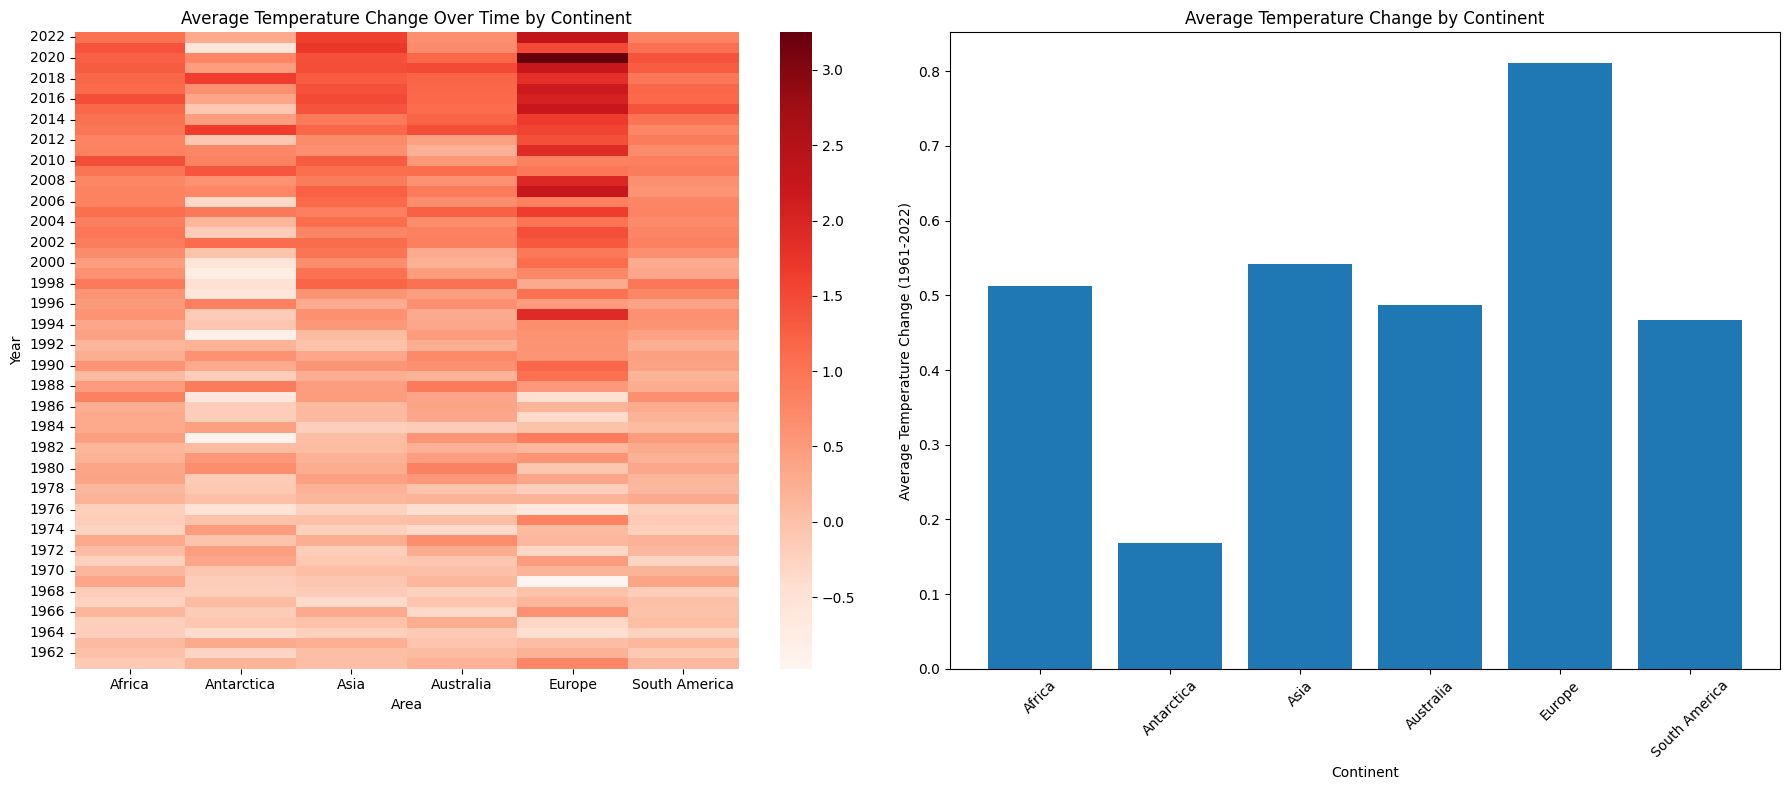

In [34]:
seasons = ['Fall', 'Winter', 'Spring', 'Summer']
cont_data = data[(data['Element']=='Temperature change') & (data['Months']!='Meteorological year') & (~data['Months'].isin(seasons))] #keep only months and temperature change
cont_data.drop(columns = [ 'Element', 'Months'], inplace = True) #drop element and months rows
continents = ['Africa', 'Asia', 'Europe', 'America', 'South America', 'Australia', 'Antarctica']
cont_data = cont_data[cont_data['Area'].isin(continents)] #only keep continents
cont_data = cont_data.groupby('Area').mean().T #group by continent and transpose (continents become columns) 
cont_data.reset_index(inplace=True)
cont_data.rename(columns={'index': 'Year'}, inplace=True)
cont_melted = cont_data.melt(id_vars=['Year'], var_name='Area', value_name='Temperature Change') #melt continents
heatmap_data = cont_melted.pivot_table(index='Year', columns='Area', values='Temperature Change').sort_values(by='Year', ascending=False) #pivot or heatmap
average_temp_change = cont_melted.groupby('Area')['Temperature Change'].mean().reset_index() #avg temperature change for each continent

fig, axes = plt.subplots(1,2, figsize=(18, 8))
sns.heatmap(heatmap_data, cmap='Reds', ax=axes[0])
axes[0].set_title('Average Temperature Change Over Time by Continent')
axes[1].bar(average_temp_change['Area'], average_temp_change['Temperature Change'])
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Average Temperature Change (1961-2022)')
axes[1].set_title('Average Temperature Change by Continent')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()





### National

The code examines the rate of temperature change across different countries from 1961 to 2022. First, it aligns the naming of countries in the original dataset with the ones in pycountry library. Then, a linear regression model is applied to calculate the rate of temperature change for each country. The results are then visualized in two ways: a geographical map, and a bar chart showcasing the top 12 countries with the highest rate of temperature change.

In [40]:
nat_data = data[
    (data['Element'] == 'Temperature change') &
    (data['Months'] != 'Meteorological year') &
    (~data['Months'].isin(seasons))
]  #keep temperature change and months rows

#match nat_data areas with pycountry areas
nat_data.loc[nat_data['Area'] == 'Türkiye', 'Area'] = 'Turkey'
nat_data.loc[nat_data['Area'] == 'United States of America', 'Area'] = 'United States'
nat_data.loc[nat_data['Area'] == 'Democratic Republic of the Congo', 'Area'] = 'Congo, The Democratic Republic of the'
nat_data.loc[nat_data['Area'] == 'Venezuela (Bolivarian Republic of)', 'Area'] = 'Venezuela, Bolivarian Republic of'
nat_data.loc[nat_data['Area'] == 'Bolivia (Plurinational State of)', 'Area'] = 'Bolivia, Plurinational State of'
nat_data.loc[nat_data['Area'] == 'United Republic of Tanzania', 'Area'] = 'Tanzania, United Republic of'

#keep only countries (not continents etc.)
country_names = [country.name for country in pycountry.countries]
nat_data = nat_data[nat_data['Area'].isin(country_names)]
nat_data.drop(columns=['Months', 'Element'], inplace=True) #drop months and element columns
nat_data = nat_data.groupby('Area').mean().reset_index() #group by area (mean for year)

#match nat_data with world areas (used below)
nat_data['Area'] = nat_data['Area'].replace('Congo, The Democratic Republic of the', 'Democratic Republic of the Congo')
nat_data['Area'] = nat_data['Area'].replace('Russian Federation', 'Russia')
nat_data['Area'] = nat_data['Area'].replace('United States', 'United States of America')
nat_data['Area'] = nat_data['Area'].replace('South Sudan', 'S. Sudan')
nat_data['Area'] = nat_data['Area'].replace('Central African Republic', 'Central African Rep.')
nat_data['Area'] = nat_data['Area'].replace('Equatorial Guinea', 'Eq. Guinea')
nat_data['Area'] = nat_data['Area'].replace('Bolivia, Plurinational State of', 'Bolivia')
nat_data['Area'] = nat_data['Area'].replace('Venezuela, Bolivarian Republic of', 'Venezuela')
nat_data['Area'] = nat_data['Area'].replace('Tanzania, United Republic of', 'Tanzania')

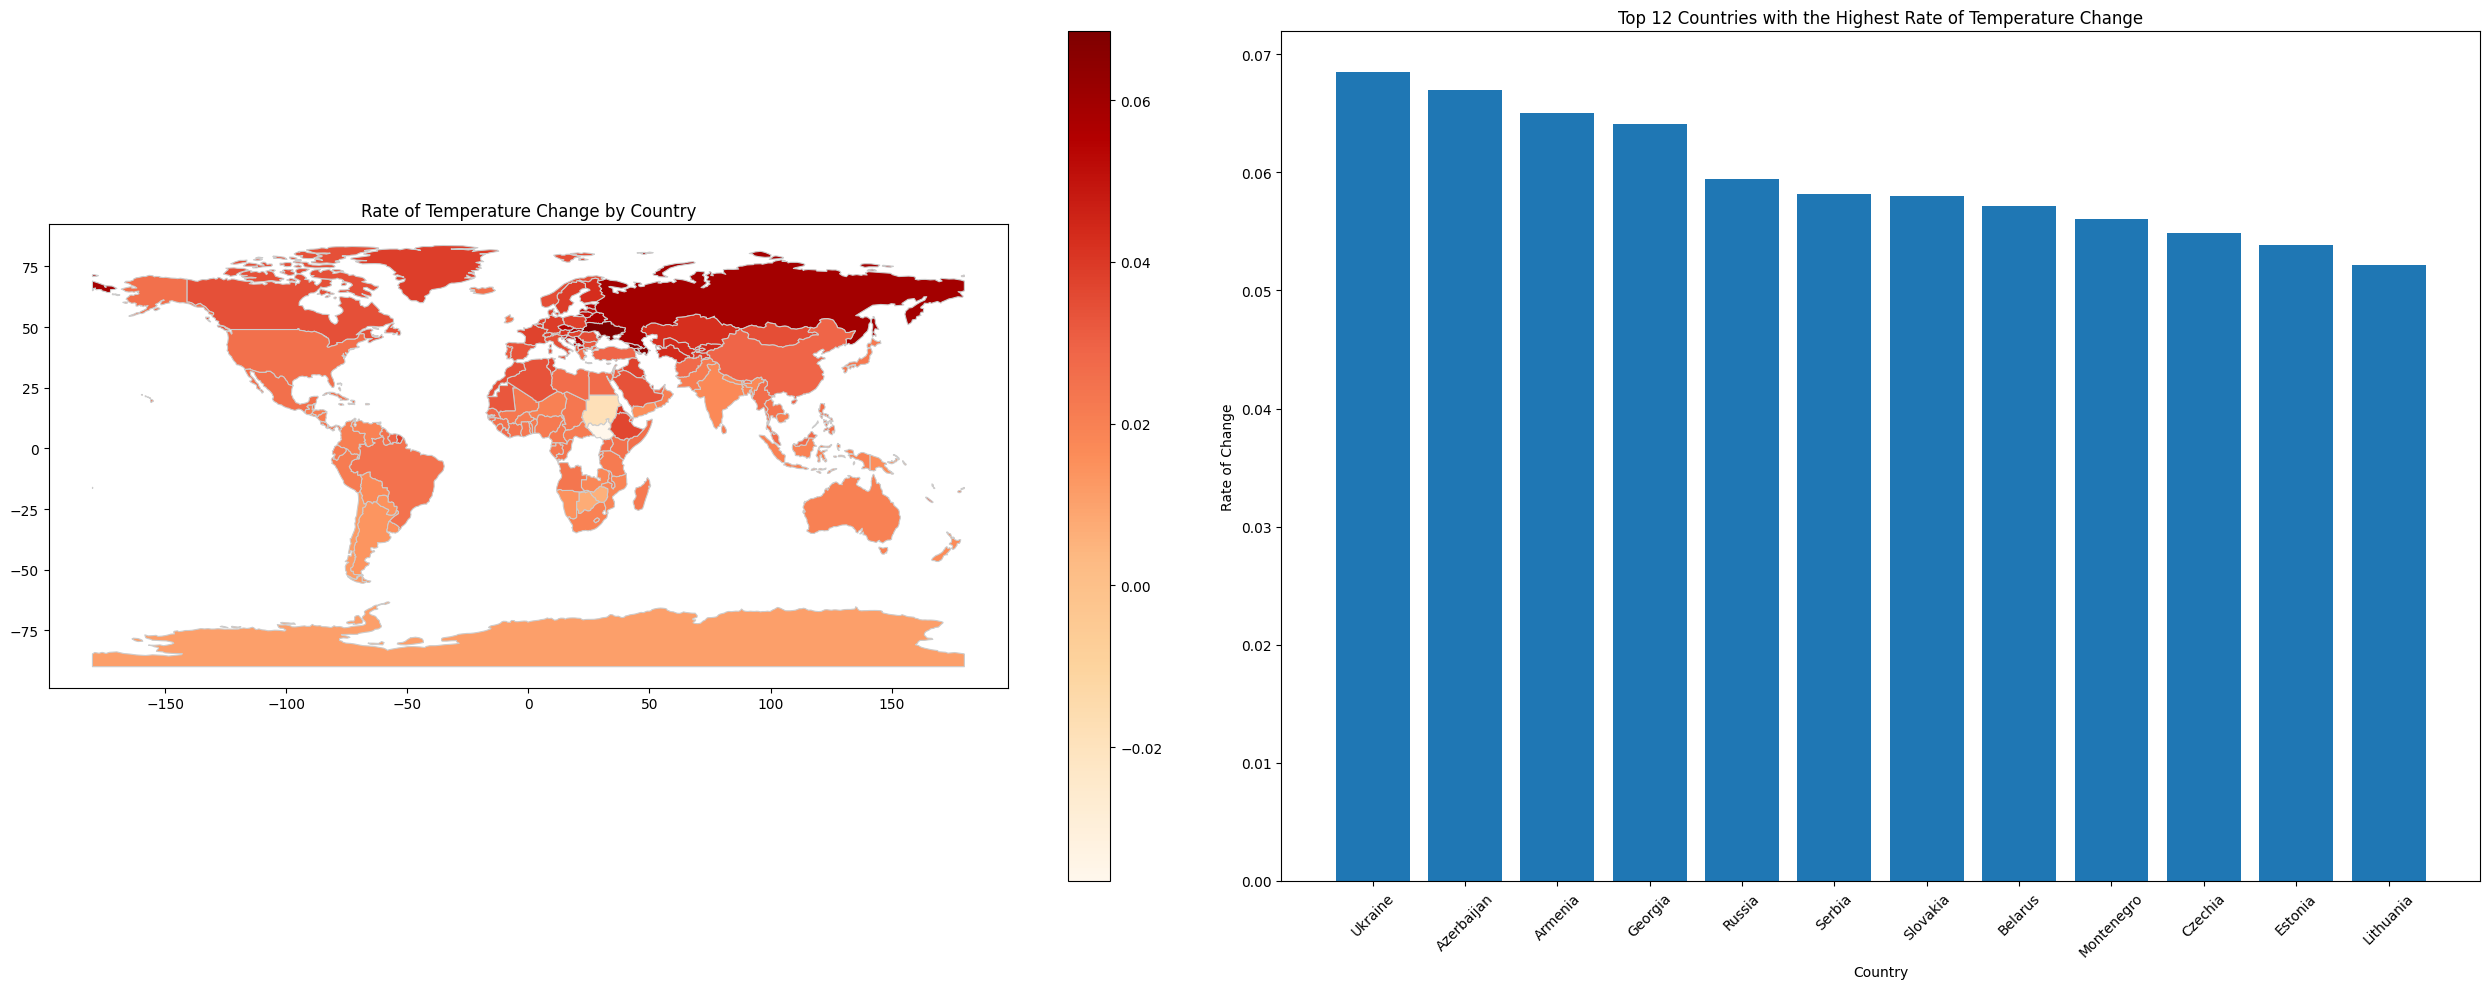

In [48]:
rate_of_change_dict = {}

for index, row in nat_data.iterrows():
    temperature_changes = row[1:].dropna().values.astype(float).reshape(-1, 1)   #drop NaN values on temperature change rows, and convert to float
    years = np.arange(1961, 1961 + len(temperature_changes)).reshape(-1, 1)   #array of years
    model = LinearRegression()
    model.fit(years, temperature_changes)
    rate_of_change = model.coef_[0][0]
    rate_of_change_dict[row["Area"]] = rate_of_change

rate_of_change_df = pd.DataFrame(
    list(rate_of_change_dict.items()), columns=["Area", "Rate of Change"]
)
rate_of_change_df = rate_of_change_df.sort_values(by="Rate of Change", ascending=False)

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
merged = world.merge(rate_of_change_df, left_on="name", right_on="Area") #merge world data with rate of change data

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1)
merged.plot(
    column="Rate of Change",
    cmap="OrRd",
    linewidth=0.8,
    ax=ax1,
    edgecolor="0.8",
    legend=True,
)
ax1.set_title("Rate of Temperature Change by Country")

top_12_rate_of_change = rate_of_change_df.nlargest(12, 'Rate of Change')
ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(top_12_rate_of_change['Area'], top_12_rate_of_change['Rate of Change'])
ax2.set_title('Top 12 Countries with the Highest Rate of Temperature Change')
ax2.set_xlabel('Country')
ax2.set_ylabel('Rate of Change')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# No data for Iran, Tanzania

Debugging

In [17]:

# y = global_data_T['Temperature change'].values
# model = ExponentialSmoothing(y, seasonal='add', seasonal_periods=12) 
# fit = model.fit()
# forecast = fit.forecast(steps=10)
# years = np.arange(1961, 1961 + len(y))
# forecast_years = np.arange(1961 + len(y), 1961 + len(y) + 10)
# plt.plot(years, y, label='Actual Temperature Change', color='blue')
# plt.plot(forecast_years, forecast, label='Forecasted Temperature Change (2023-2033)', color='green', linestyle='dashed')
# plt.xlabel('Year')
# plt.ylabel('Temperature Change')
# plt.title('Temperature Change Over Time')
# plt.legend()
# plt.show()
# print(rate_of_change_df[rate_of_change_df['Area'].str.contains('Guinea')])
# print(world[world['name'].str.contains('Guinea')])
# world[world['name'].str.contains('Congo')]
# merged[merged['Area'].str.contains('Gabon')]
# print(world['name'].sort_values().unique())
# areas_starting_with_t = [area for area in nat_data['Area'].sort_values().unique() if area.startswith('Ga')]
# print(areas_starting_with_t)
